In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

<Axes: xlabel='skill_count', ylabel='skill_pay'>

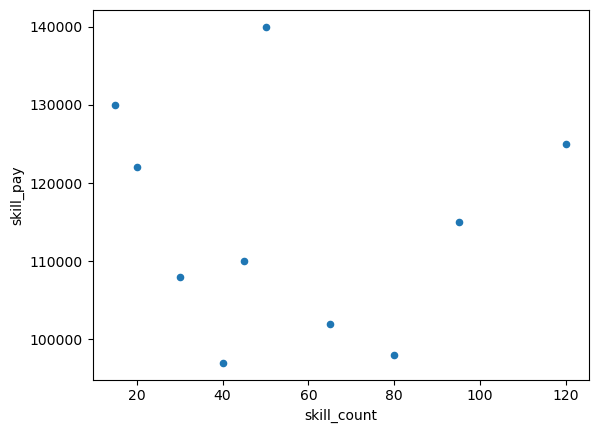

In [11]:
data = {
    'job_skills': ['Python', 'SQL', 'Excel', 'Tableau', 'TensorFlow', 'R', 'Power BI', 'Java', 'Hadoop', 'Spark'],
    'skill_count': [120, 95, 80, 65, 50, 45, 40, 30, 20, 15],
    'skill_pay': [125000, 115000, 98000, 102000, 140000, 110000, 97000, 108000, 122000, 130000]
}

df1 = pd.DataFrame(data)

df1.plot(kind = 'scatter', x = 'skill_count', y='skill_pay')

In [12]:
df = df[df.job_title_short == 'Data Analyst']

In [20]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

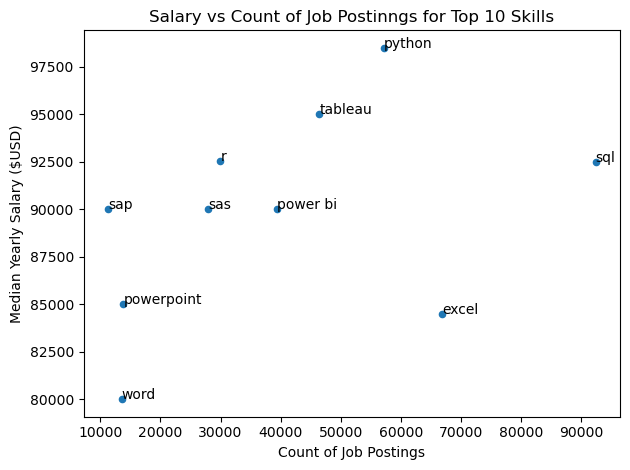

In [ ]:
skill_stats.plot(kind='scatter',x = 'skill_count',y='median_salary')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.title('Salary vs Count of Job Postinngs for Top 10 Skills')
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)
    
plt.tight_layout()